<h1 align="center"> Machine Learning </h1>
<h2 align="center"> Final Project</h3>
<h5 align="center"> Mohammad Hossein Shafieizadegan </h5>
<h5 align="center"> 99104781</h5>

# Project Intriduction

### Required modules

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier

## Load dataest

The followings must done:
- Load dataset
- Convert categorical features into numeric using one hot encoding
- Clean data by removing possible NaN objects

In [3]:
# Load dataset
df = pd.read_csv('../Data/dataset.csv', header=0, index_col=0)

### Visualization

In order to have an overview of the dataset and it's features, we will inspect the first few rows of the dataset.

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6873,29,services,divorced,secondary,no,1336,yes,no,unknown,28,may,298,5,-1,0,unknown,no
9699,46,services,married,secondary,no,2215,no,no,unknown,6,jun,222,2,-1,0,unknown,no
44306,45,technician,married,secondary,no,2776,yes,no,cellular,27,jul,287,2,181,1,success,yes
37470,31,services,married,secondary,no,143,yes,no,cellular,13,may,221,2,-1,0,unknown,no
35895,44,technician,single,secondary,no,293,yes,no,cellular,8,may,345,2,358,1,failure,no


#### Here we observe the output labels. We note that this dataset is highly imbalance. This will affect the type of classifier we are going to choose alongside with the performance metric.

<AxesSubplot:xlabel='y', ylabel='count'>

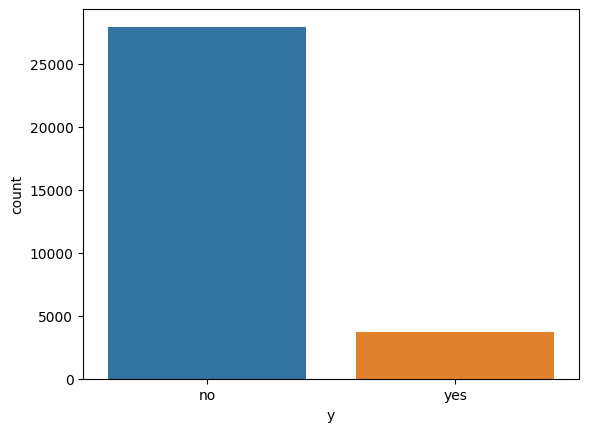

In [5]:
sns.countplot(x='y', data=df)

### Heatmap for correlation of numeric feaures

We will use heatmap for observing the correlation of the features

<AxesSubplot:>

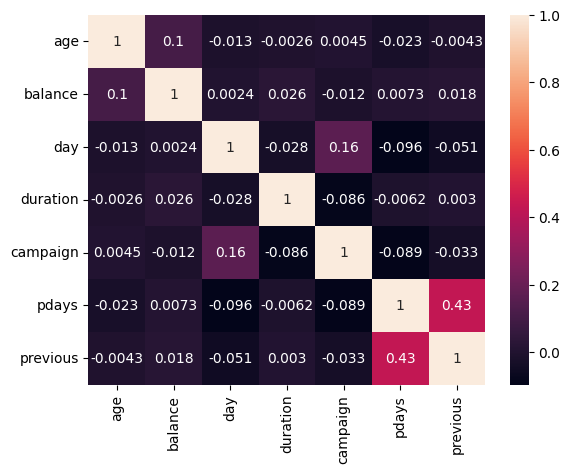

In [6]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

### Make all feaures numeric

#### What is Label encoding
LabelEncoder is a simple preprocessing step that can be applied to categorical variables. It works similarly to one-hot encoding by mapping each unique category to a numeric value. However, rather than a binary vector, each value is encoded as a single integer. 

For example, 'dog' may be 1, 'cat' 2, 'bird' 3. This compact numeric representation allows categorical variables to be used directly in machine learning models. Like one-hot encoding, it transforms categorical variables into a numerical format. But label encoding results in a single integer per sample, rather than a binary vector, reducing the dimensions for some model types.


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Use LabelEncoder for each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

dataset = df.dropna()


In [8]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6873,29,7,0,1,0,1336,1,0,2,28,8,298,5,-1,0,3,0
9699,46,7,1,1,0,2215,0,0,2,6,6,222,2,-1,0,3,0
44306,45,9,1,1,0,2776,1,0,0,27,5,287,2,181,1,2,1
37470,31,7,1,1,0,143,1,0,0,13,8,221,2,-1,0,3,0
35895,44,9,2,1,0,293,1,0,0,8,8,345,2,358,1,0,0


<AxesSubplot:>

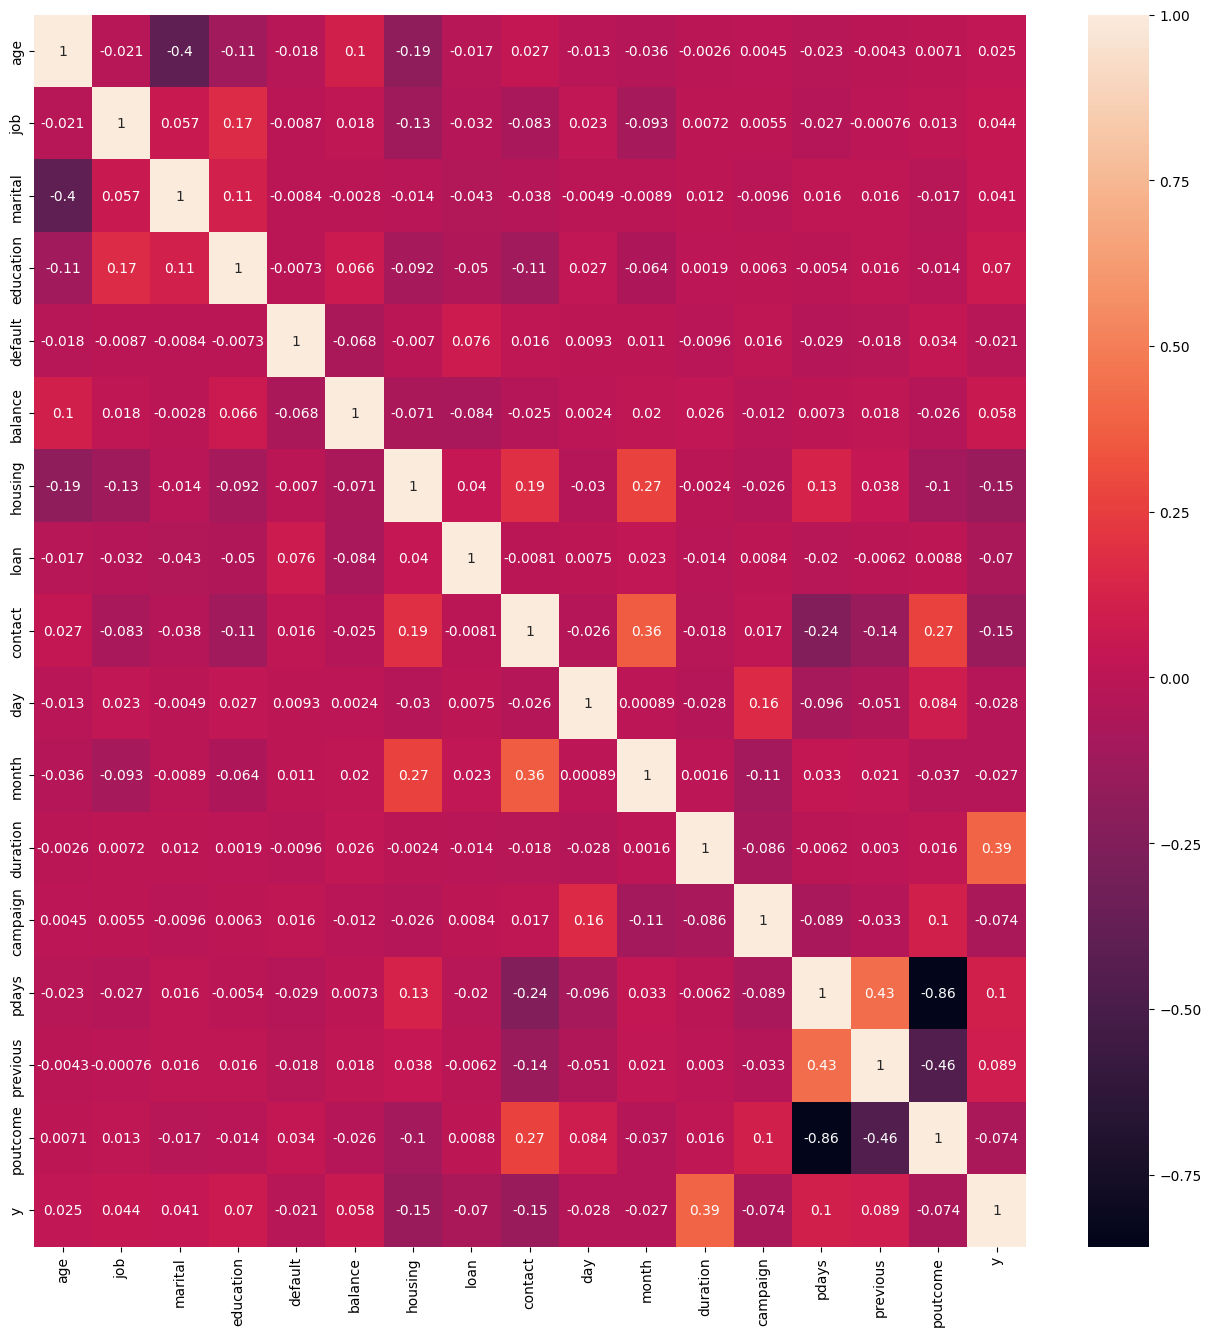

In [9]:
# Plot heatmap on the new dataset
plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True)

### Discussing the correlation matrix

Regarding the above figure, most of the features are not correlated with eachother except for the following pairs:
- poutcome & pdays
- previous & pdays
- previous & poutcome
- marital & age

These correlation between these features, make sense quite well

### Histogram of the features

For better understanding of the features values, we visualize the histograms of each feature using subplots

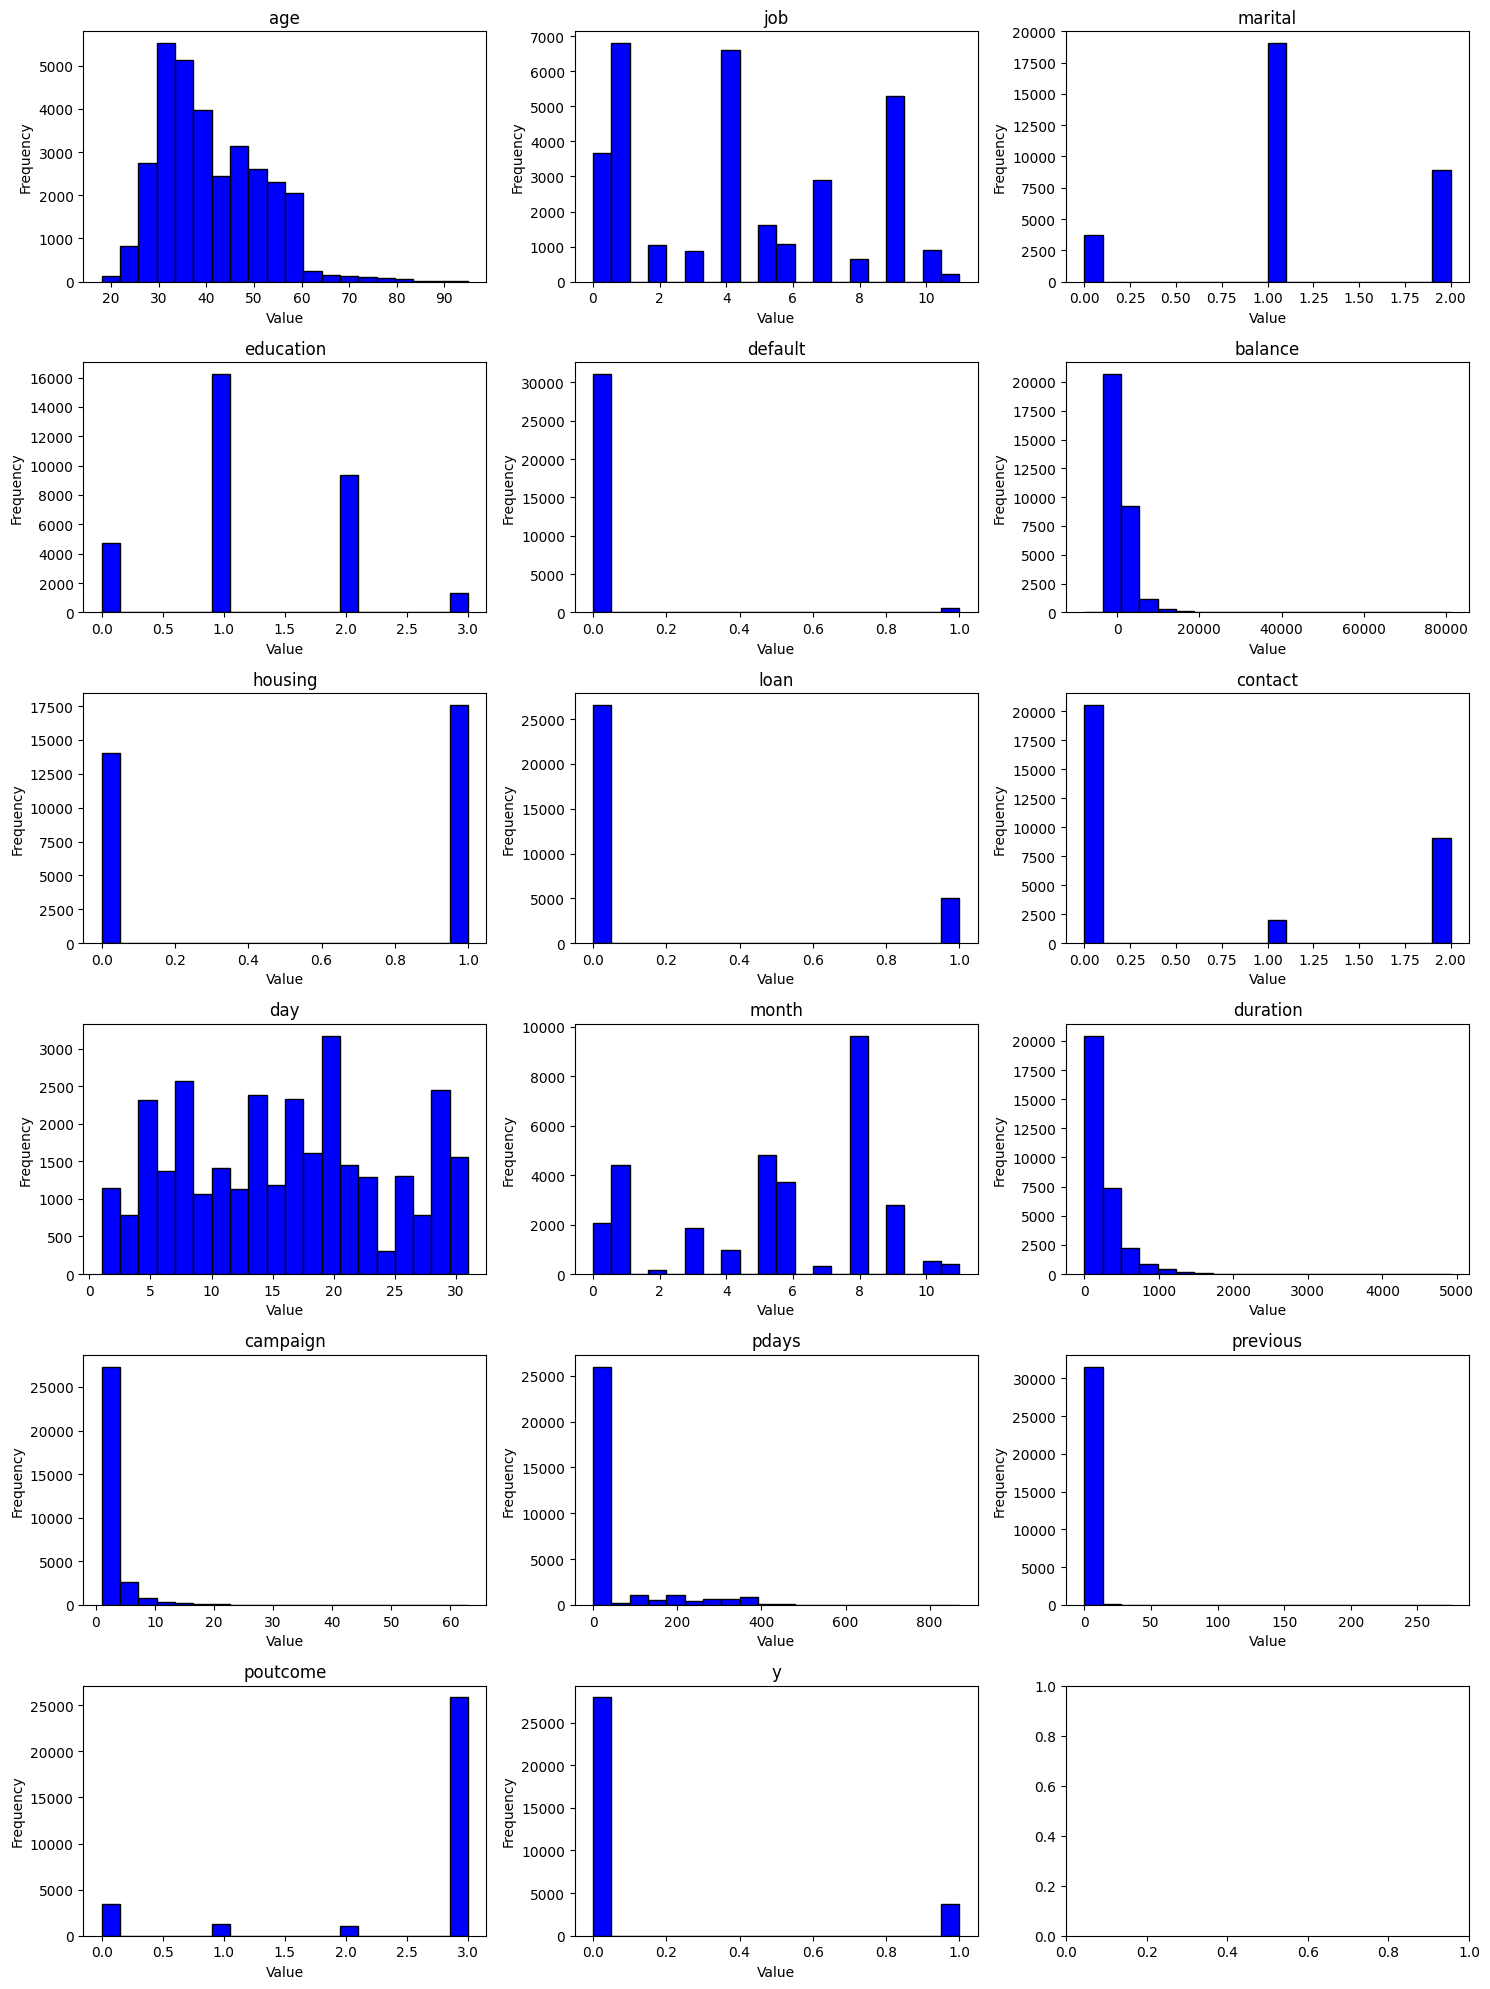

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=round(len(dataset.columns)/3), ncols=3, figsize=(15, 20)) 
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(dataset.columns):
    ax = axes[i]
    ax.hist(dataset[column], bins=20, color='blue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Visualization

In this section we randomly choose two features. Then using the labels (y), we will find the label of the data point and we will visualize it using scatter plot and different color for labels.

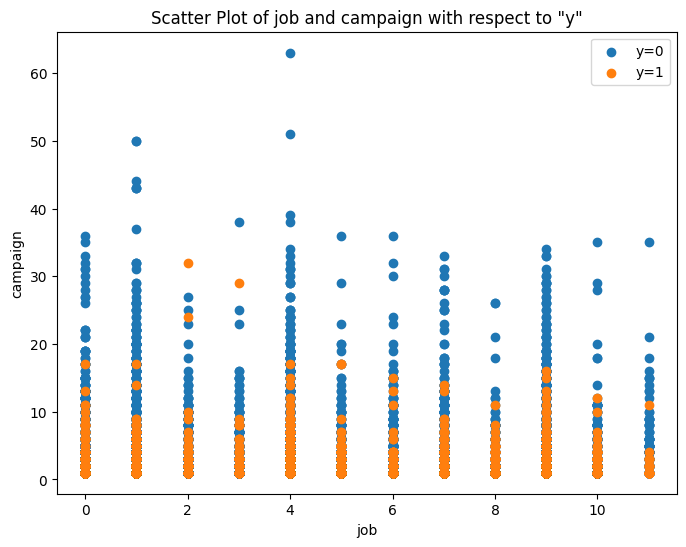

In [11]:
random_features = np.random.choice(dataset.columns.drop('y'), size=2, replace=False)

# Scatter plot with binary target variable "y"
plt.figure(figsize=(8, 6))
for value in dataset['y'].unique():
    subset = dataset[dataset['y'] == value]
    plt.scatter(subset[random_features[0]], subset[random_features[1]], label=f'y={value}')

plt.xlabel(random_features[0])
plt.ylabel(random_features[1])
plt.title(f'Scatter Plot of {random_features[0]} and {random_features[1]} with respect to "y"')
plt.legend()
plt.show()

### We regenerate these figures for different random features

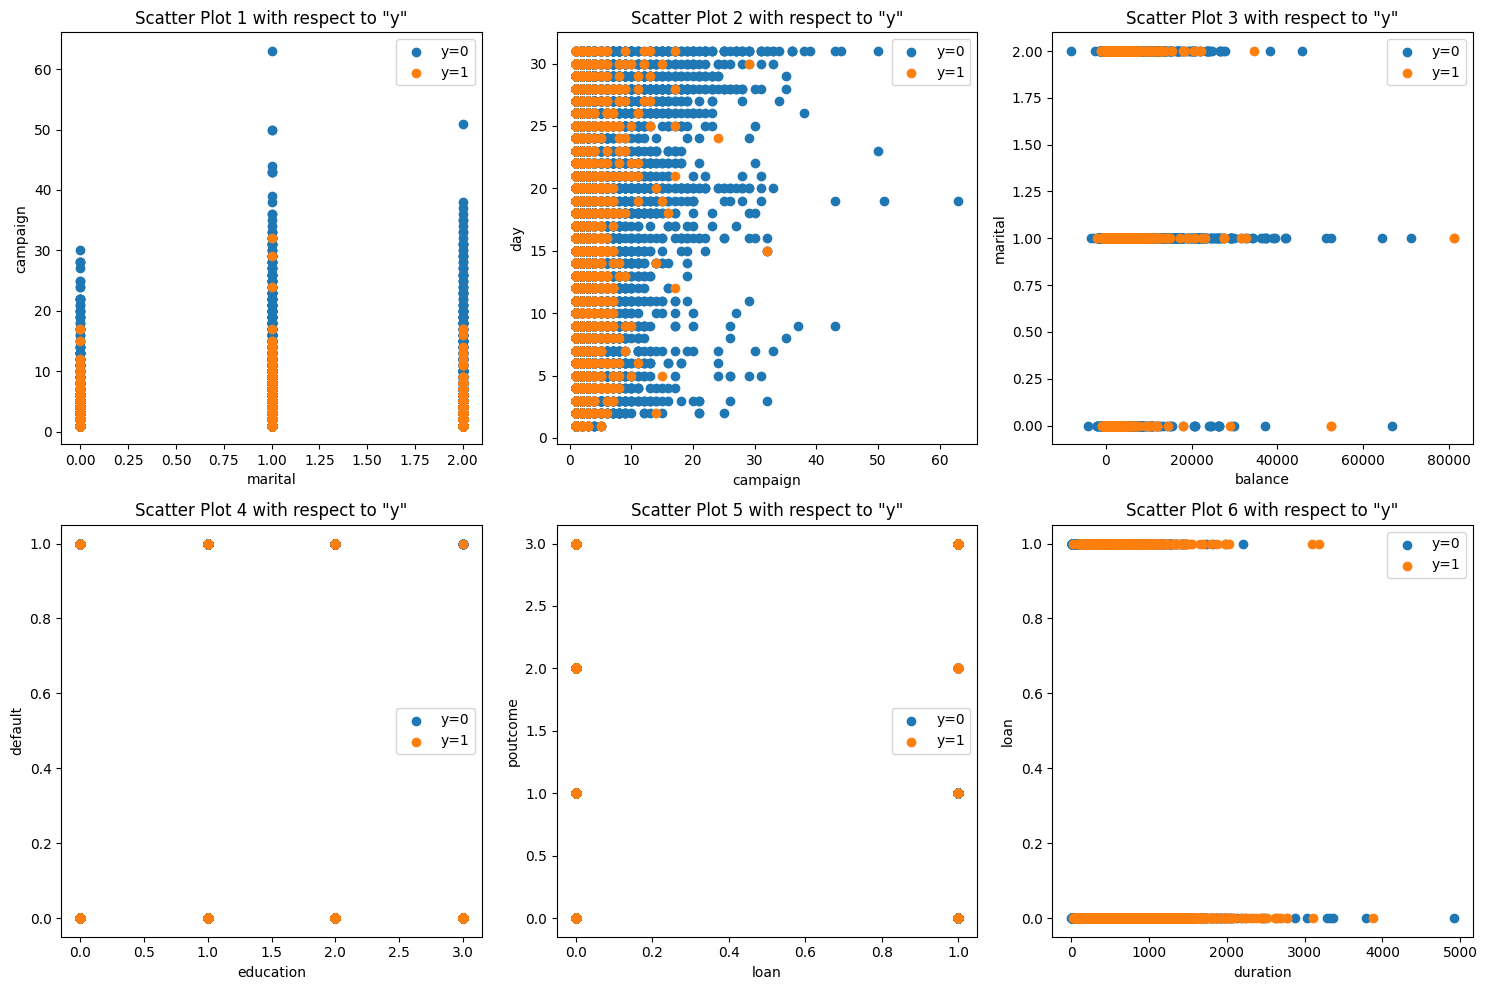

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust nrows and ncols based on the number of subplots
axes = axes.flatten()

for i in range(6):
    # Select two random features
    random_features = np.random.choice(dataset.columns.drop('y'), size=2, replace=False)

    # Scatter plot with encoded binary target variable "y"
    ax = axes[i]
    for value in dataset['y'].unique():
        subset = dataset[dataset['y'] == value]
        ax.scatter(subset[random_features[0]], subset[random_features[1]], label=f'y={value}')

    ax.set_xlabel(random_features[0])
    ax.set_ylabel(random_features[1])
    ax.set_title(f'Scatter Plot {i+1} with respect to "y"')
    ax.legend()

plt.tight_layout()
plt.show()

### Discussion

It can be seen that for some combinations of the features, We only see data of only one classes. For other cases, the data are not well seperable. This totally make sense as the original space has a much higher dimention rather than 2

### Training the Model

First we seperate our dataset to train and test datasets. We note that this step is totally seperated and different that the cross-validation process

In [13]:
X = dataset.drop('y', axis=1)
y = dataset['y']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Classofier to use

For imbalanced datasets, where one class has significantly fewer samples than the other, it's important to choose classifiers that can handle class imbalances effectively. Here are some classifiers that are often used for imbalanced datasets:
- Random Forest (with class weights)
- Support Vector Machines (SVM)

In the process of assessing the performance of the models in finding the optimal hyperparameters, we will use f1-score metric as its more important than accuracy for imbalanced datasets

## Random Forest Classifier

In the following code, we will utilize some nested for loops where we check different values for hyper parameters in searching of the optimal ones. For each combination of the hyper-parameters (inside the nested loop), we will train our model, evaluate it using our cross valudation function which is implemented from scratch and finally assign the best parameters if the performance of our model has increased. 

In implementing the cross-validation from scratch, we have simply use a for loop for number of folds. In each iteration, we have chosen the corresponding fold for validation and the rest for training.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

# Define the hyperparameters to search
n_estimators_values = [50, 100, 200]
max_depth_values = [None, 10, 20]

# Fix other hyperparameters with recommended values
min_samples_split_value = 2
min_samples_leaf_value = 1
class_weight_value = 'balanced'  # Adjusting for imbalanced dataset

# Define the number of folds for cross-validation
num_folds = 5

# Initialize variables to store the best hyperparameters and corresponding F1 score
rf_best_params = {'n_estimators': None, 'max_depth': None}
rf_best_f1_score = 0
step = 0

# Perform hyperparameter tuning and cross-validation using a for loop
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Initialize Random Forest classifier with current hyperparameters
        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split_value,
            min_samples_leaf=min_samples_leaf_value,
            class_weight=class_weight_value,
            random_state=42
        )

        # Initialize variables to store F1 scores
        f1_scores = []

        # Calculate fold size
        fold_size = len(X_train) // num_folds

        # Perform cross-validation
        for i in range(num_folds):
            # Define validation set indices
            val_start = i * fold_size
            val_end = (i + 1) * fold_size
            val_indices = list(range(val_start, val_end))

            # Define training set indices
            train_indices = [idx for idx in range(len(X_train)) if idx not in val_indices]

            # Split the data into training and validation sets
            X_train_fold, X_val_fold = X_train.iloc[train_indices], X_train.iloc[val_indices]
            y_train_fold, y_val_fold = y_train.iloc[train_indices], y_train.iloc[val_indices]

            # Fit the model on the training set
            rf_classifier.fit(X_train_fold, y_train_fold)

            # Make predictions on the validation set
            y_pred = rf_classifier.predict(X_val_fold)

            # Evaluate the model using F1 score
            f1 = f1_score(y_val_fold, y_pred)
            f1_scores.append(f1)

        # Calculate the average F1 score across all folds
        average_f1_score = np.mean(f1_scores)

        step += 1
        print(f"Step {step}, n_estimators = {n_estimators}, max depth = {max_depth}, Best f1 score: {rf_best_f1_score}, current f1 score: {average_f1_score}")

        # Update the best parameters if a higher F1 score is found
        if average_f1_score > rf_best_f1_score:
            rf_best_f1_score = average_f1_score
            rf_best_params['n_estimators'] = n_estimators
            rf_best_params['max_depth'] = max_depth

# Display the best parameters and their corresponding F1 score
print("Best Parameters:", rf_best_params)
print("Best Average F1 Score:", rf_best_f1_score)


Step 1, n_estimators = 50, max depth = None, Best f1 score: 0, current f1 score: 0.4139194790855963
Step 2, n_estimators = 50, max depth = 10, Best f1 score: 0.4139194790855963, current f1 score: 0.5556746241700885
Step 3, n_estimators = 50, max depth = 20, Best f1 score: 0.5556746241700885, current f1 score: 0.46435013507743933
Step 4, n_estimators = 100, max depth = None, Best f1 score: 0.5556746241700885, current f1 score: 0.4210151506579722
Step 5, n_estimators = 100, max depth = 10, Best f1 score: 0.5556746241700885, current f1 score: 0.5584902463411066
Step 6, n_estimators = 100, max depth = 20, Best f1 score: 0.5584902463411066, current f1 score: 0.461314729872378
Step 7, n_estimators = 200, max depth = None, Best f1 score: 0.5584902463411066, current f1 score: 0.4168236727198244
Step 8, n_estimators = 200, max depth = 10, Best f1 score: 0.5584902463411066, current f1 score: 0.5593160491121145
Step 9, n_estimators = 200, max depth = 20, Best f1 score: 0.5593160491121145, current

## Test model

In the previous section, we have found the optimal hyperparemeter in our restricted and limited search space. Note that for better performance we can enlarge the searching space or we can utilize evolutionary algortithms.

For our best model, we assess the performance using test data. Different metrices including `precesion`, `recall`, `accuracy` and `f1-score` have been calculated

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8384
           1       0.45      0.81      0.57      1111

    accuracy                           0.86      9495
   macro avg       0.71      0.84      0.75      9495
weighted avg       0.91      0.86      0.88      9495



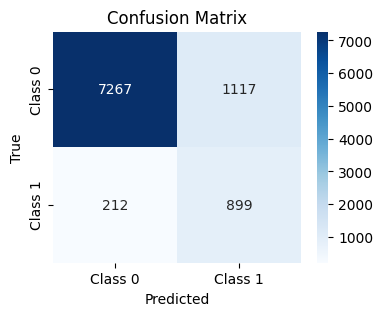

In [15]:
# Use the best parameters to train the Random Forest model on the entire training set
from sklearn.metrics import classification_report, confusion_matrix

final_rf_classifier = RandomForestClassifier(
            n_estimators=rf_best_params['n_estimators'],
            max_depth=rf_best_params['max_depth'],
            min_samples_split=min_samples_split_value,
            min_samples_leaf=min_samples_leaf_value,
            class_weight=class_weight_value,
            random_state=42
        )
final_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set for Random Forest
rf_y_pred = final_rf_classifier.predict(X_test)

# Evaluate the Random Forest model on the test set
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

conf_mat = confusion_matrix(y_test, rf_y_pred)
# Plot confusion matrix as a heatmap using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Random forest results

It can be vivdly seen that the accuracy is at quite well level of **86%**. Also we note the values of f1-score whcih demonstrate the good performance of the model

## SVM

Now we do the same for SVM classifier. We note that for decreasing the complexity and required time for training the model, we have just used 500 samples for the training process. As we realized that we have acheived an acceptable and quite well performance on the test data, we kept this 500 samples for finding the optimal hyperparameters.

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import numpy as np

# Define the hyperparameters to search
C_values = [0.1, 1]
kernel_values = ['linear', 'rbf']
gamma = 'scale'

X_train_subset = X_train[:500]
y_train_subset = y_train[:500]

# Define the number of folds for cross-validation
num_folds = 5

# Initialize variables to store the best hyperparameters and corresponding F1 score
svm_best_params = {'C': None, 'kernel': None}
svm_best_f1_score = 0
step = 0

# Perform hyperparameter tuning and cross-validation using a for loop
for C in C_values:
    for kernel in kernel_values:
        # Initialize SVM classifier with current hyperparameters
        svm_classifier = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

        # Initialize variables to store F1 scores
        f1_scores = []

        # Calculate fold size
        fold_size = len(X_train_subset) // num_folds

        # Perform cross-validation
        for i in range(num_folds):
            # Define validation set indices
            val_start = i * fold_size
            val_end = (i + 1) * fold_size
            val_indices = list(range(val_start, val_end))

            # Define training set indices
            train_indices = [idx for idx in range(len(X_train_subset)) if idx not in val_indices]

            # Split the data into training and validation sets
            X_train_fold, X_val_fold = X_train_subset.iloc[train_indices], X_train_subset.iloc[val_indices]
            y_train_fold, y_val_fold = y_train_subset.iloc[train_indices], y_train_subset.iloc[val_indices]

            # Fit the model on the training set
            print(f'training ...  step {step+1}, fold {i+1}')
            svm_classifier.fit(X_train_fold, y_train_fold)

            # Make predictions on the validation set
            y_pred = svm_classifier.predict(X_val_fold)

            # Evaluate the model using F1 score
            f1 = f1_score(y_val_fold, y_pred)
            f1_scores.append(f1)

        # Calculate the average F1 score across all folds
        average_f1_score = np.mean(f1_scores)

        step += 1
        print(f"Step {step}, C = {C}, kernel = {kernel}, Best f1 score: {svm_best_f1_score}, current f1 score: {average_f1_score}")
        
        # Update the best parameters if a higher F1 score is found
        if average_f1_score > svm_best_f1_score:
            svm_best_f1_score = average_f1_score
            svm_best_params['C'] = C
            svm_best_params['kernel'] = kernel

# Display the best parameters and their corresponding F1 score
print("Best Parameters:", svm_best_params)
print("Best Average F1 Score:", svm_best_f1_score)


training ...  step 1, fold 1
training ...  step 1, fold 2
training ...  step 1, fold 3
training ...  step 1, fold 4
training ...  step 1, fold 5
Step 1, C = 0.1, kernel = linear, Best f1 score: 0, current f1 score: 0.26840336134453774
training ...  step 2, fold 1
training ...  step 2, fold 2
training ...  step 2, fold 3
training ...  step 2, fold 4
training ...  step 2, fold 5
Step 2, C = 0.1, kernel = rbf, Best f1 score: 0.26840336134453774, current f1 score: 0.0
training ...  step 3, fold 1
training ...  step 3, fold 2
training ...  step 3, fold 3
training ...  step 3, fold 4
training ...  step 3, fold 5
Step 3, C = 1, kernel = linear, Best f1 score: 0.26840336134453774, current f1 score: 0.3466666666666667
training ...  step 4, fold 1
training ...  step 4, fold 2
training ...  step 4, fold 3
training ...  step 4, fold 4
training ...  step 4, fold 5
Step 4, C = 1, kernel = rbf, Best f1 score: 0.3466666666666667, current f1 score: 0.023529411764705882
Best Parameters: {'C': 1, 'kernel

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8384
           1       0.51      0.18      0.27      1111

    accuracy                           0.88      9495
   macro avg       0.71      0.58      0.60      9495
weighted avg       0.86      0.88      0.86      9495



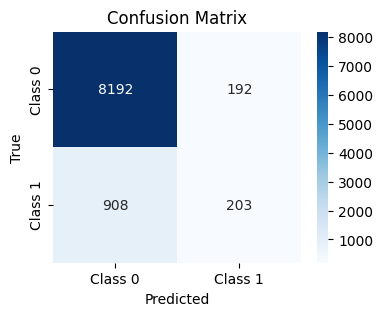

In [17]:
# Use the best parameters to train the SVM model on the entire training set
final_svm_classifier = SVC(C=svm_best_params['C'], kernel=svm_best_params['kernel'], gamma=gamma, random_state=42)
final_svm_classifier.fit(X_train[:500], y_train[:500])

# Make predictions on the test set for SVM
svm_y_pred = final_svm_classifier.predict(X_test)

# Evaluate the SVM model on the test set
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

conf_mat = confusion_matrix(y_test, svm_y_pred)
# Plot confusion matrix as a heatmap using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### The good performance of the model on test data can be seen well

## Majority Voting

Regarding the fact that we have trained two models for our classification task, perhaps it would be recommended to combine these classifier via majority voting to see whether the performance will enhance or not.

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8384
           1       0.44      0.01      0.01      1111

    accuracy                           0.88      9495
   macro avg       0.66      0.50      0.48      9495
weighted avg       0.83      0.88      0.83      9495



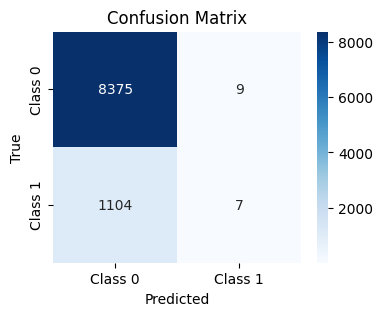

In [18]:
# Create a VotingClassifier with majority voting
from sklearn.ensemble import VotingClassifier


voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('rf', rf_classifier)
], voting='hard')

# Train the VotingClassifier on the entire training set
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
voting_y_pred = voting_classifier.predict(X_test)

# Evaluate the VotingClassifier on the test set
print("Voting Classifier Classification Report:")
print(classification_report(y_test, voting_y_pred))

conf_mat = confusion_matrix(y_test, voting_y_pred)
# Plot confusion matrix as a heatmap using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

It can be seen that we achieved the same performance as of the SVM classifier. Therefore, in this case majority voting is not a well solution!!

## Model inspection

In this section, we try to figure our the SVM decision boundary and also the decision trees, used in the random forest method.

As of the SVM boundary we note that the `sklearn.Inspection` module doesn't work anymore. Therefore, we decided to use the following code to do so where we have utilized the `.decision_function()` function. As we have only used two features the results doesn't represent enough information.

C:\Users\Moh\AppData\Local\Temp\ipykernel_23476\2645270618.py:20: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)


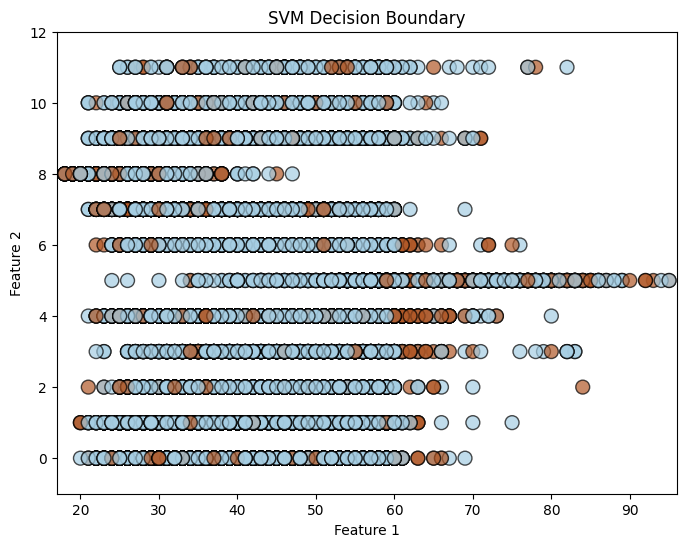

In [21]:
final_svm_classifier.fit(X.values[:, 0:2], y)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100, linewidth=1, alpha=0.7)

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X.values[:, 0].min() - 1, X.values[:, 0].max() + 1, 100),
                     np.linspace(X.values[:, 1].min() - 1, X.values[:, 1].max() + 1, 100))

# Flatten the meshgrid and make predictions for each point
Z = final_svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)

plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Random Forest

We know that several decision trees are used in the random forest method. These decision tree are quite big and huge. Here we have only visualize one of them

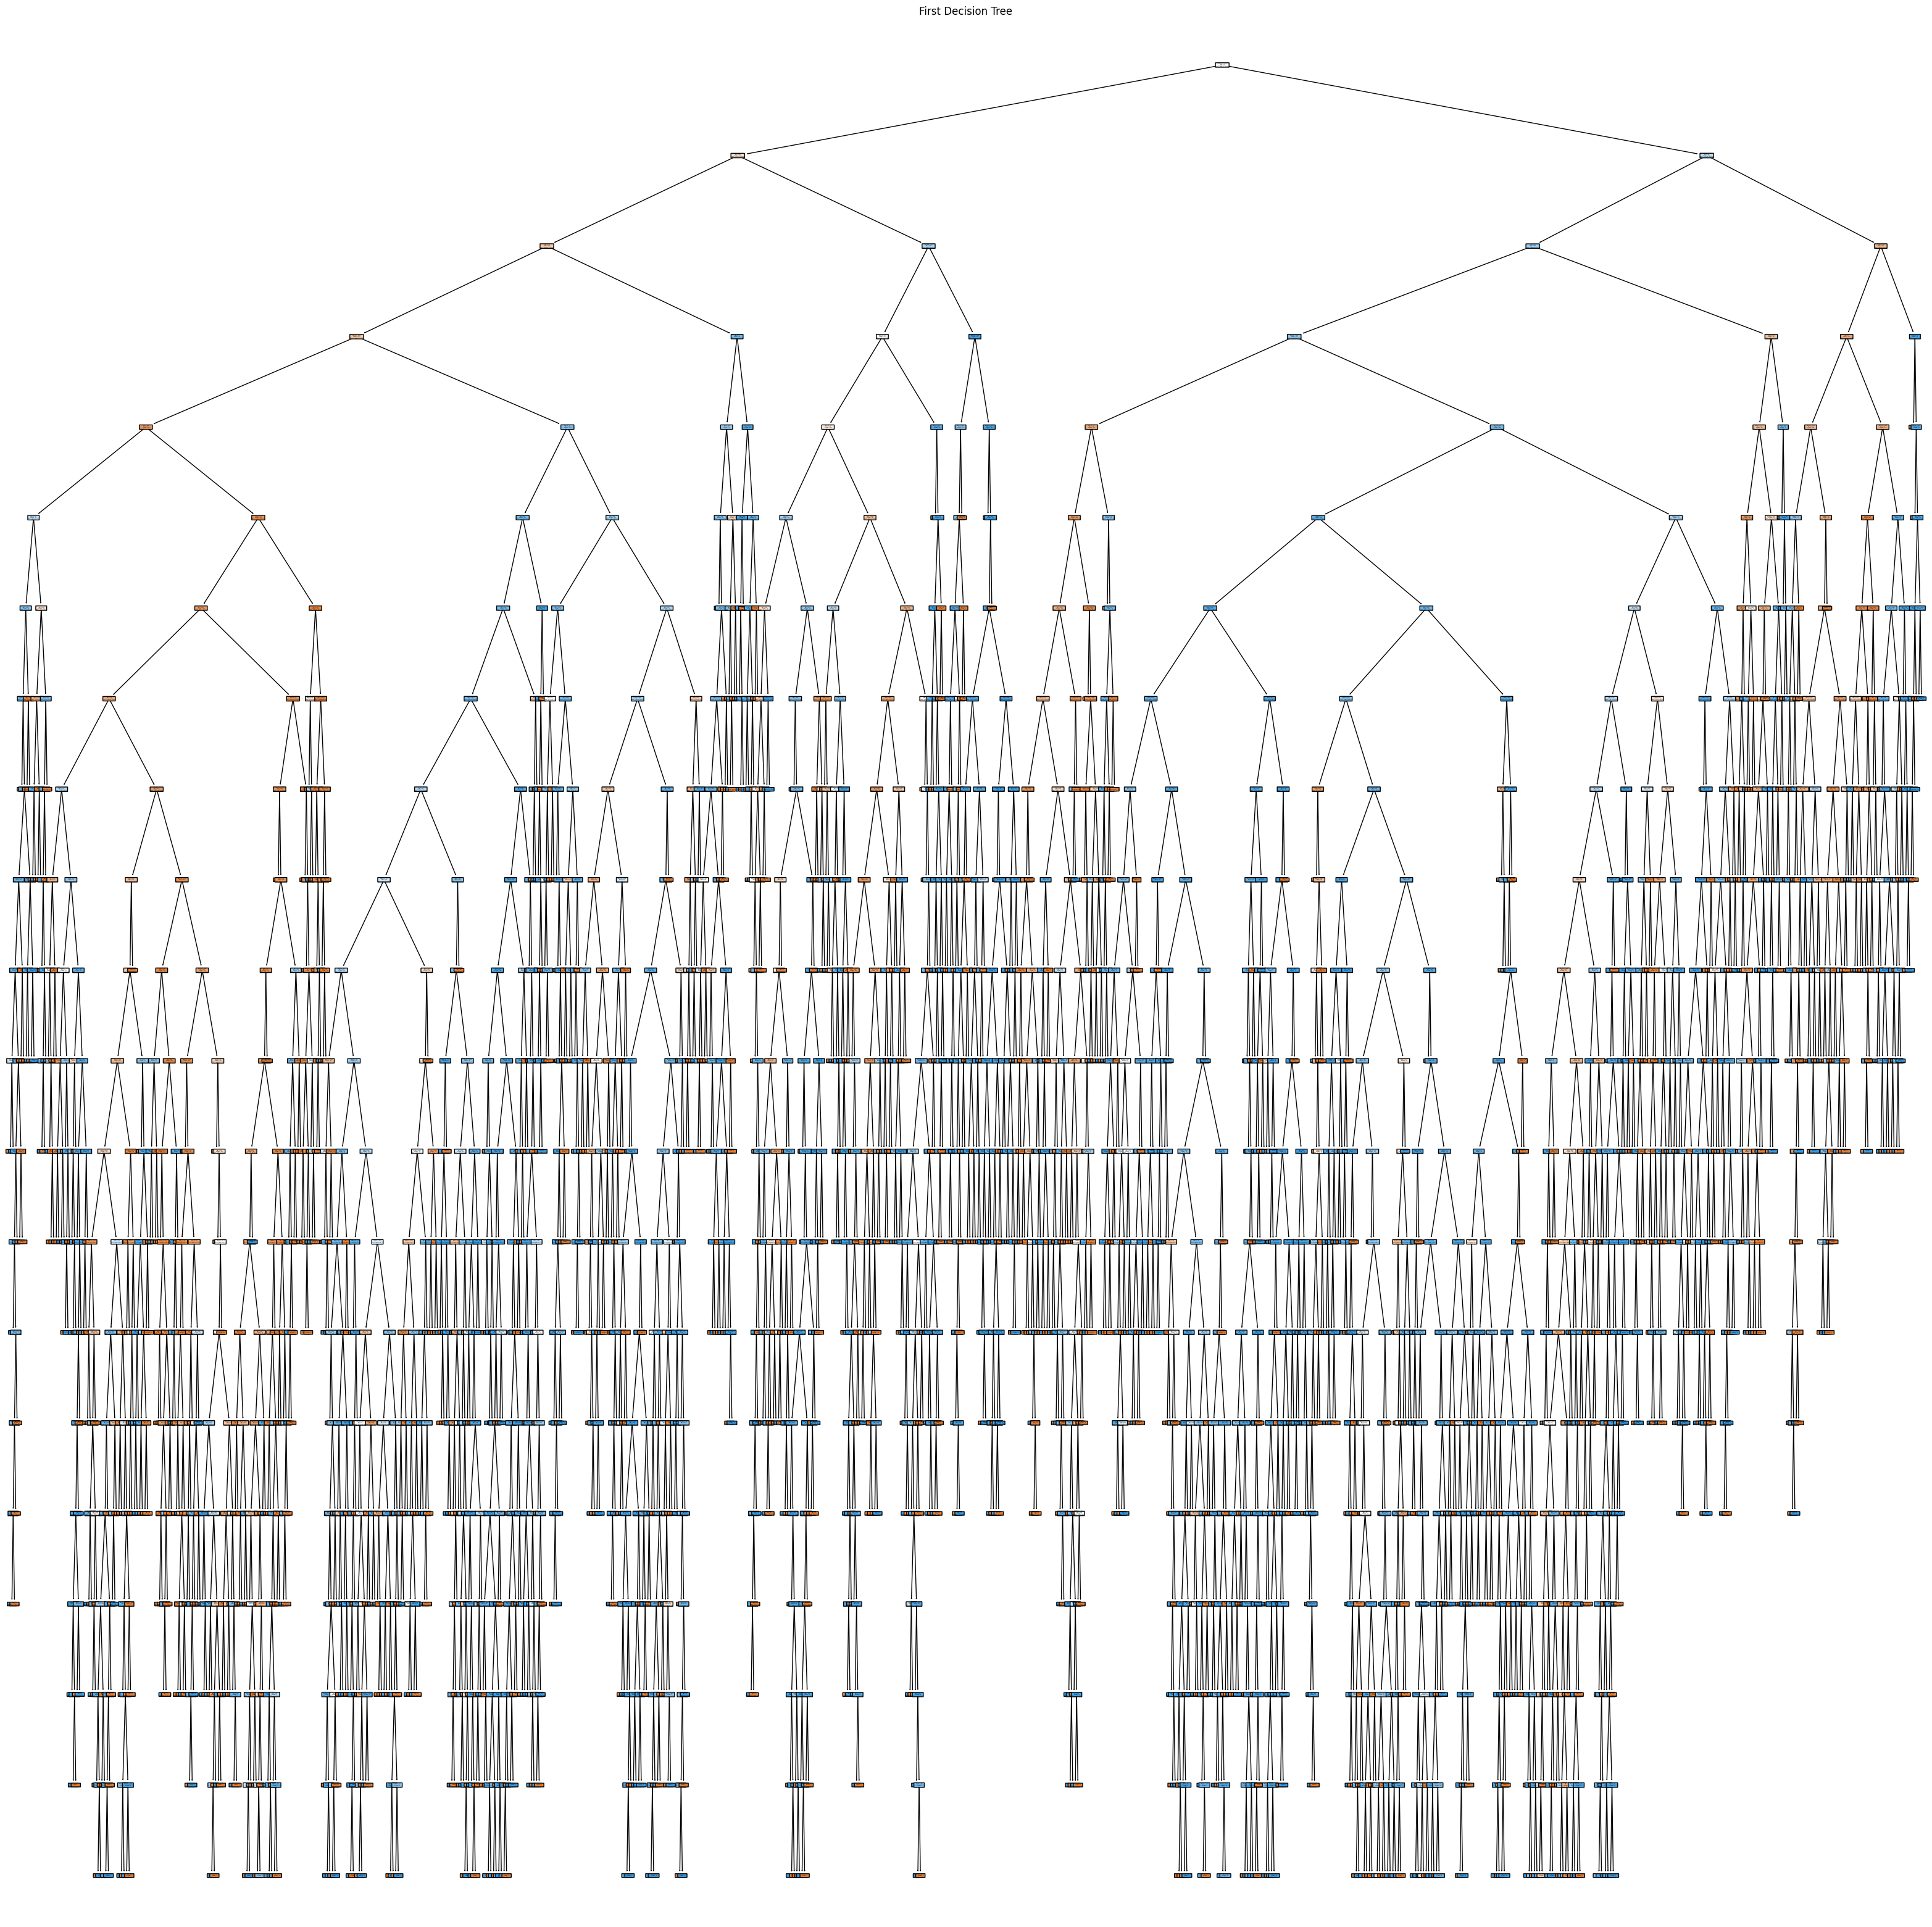

In [22]:
from sklearn.tree import plot_tree


plt.figure(figsize=(40, 40))
    
# Convert class labels to strings
class_labels = [str(label) for label in np.unique(y_train)]
    
plot_tree(
    rf_classifier.estimators_[0],
    feature_names=X_train.columns,
    class_names=class_labels,
    filled=True,
    rounded=True
)
    
plt.title("First Decision Tree")
plt.show()

### Train using only one feature

For this section, in a for loop for all features, we will consider one feature and do the following:
- Train the model using that feature
- Evaluate the model using accuracy criteria
- Store the results

Finally after the above process get finished for all features, we will sort the features based on the resulted accuracy. The results can be seen below

In [23]:
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Initialize an empty dictionary to store feature importances and accuracies
feature_importance_dict = {'Feature': [], 'Accuracy': []}

# Loop through each feature
for feature in X_train.columns:
    # Train the classifier using only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    rf_classifier.fit(X_train_feature, y_train)
    
    # Make predictions
    y_pred = rf_classifier.predict(X_test_feature)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store feature importance and accuracy in the dictionary
    feature_importance_dict['Feature'].append(feature)
    feature_importance_dict['Accuracy'].append(accuracy)

    print(f"Feature: {feature}: accuracy = {accuracy}")

# Sort the dictionary by accuracy in descending order
sorted_feature_importance_dict = {
    'Feature': [],
    'Accuracy': []
}

sorted_indices = sorted(range(len(feature_importance_dict['Accuracy'])), key=lambda k: feature_importance_dict['Accuracy'][k], reverse=True)

for idx in sorted_indices:
    sorted_feature_importance_dict['Feature'].append(feature_importance_dict['Feature'][idx])
    sorted_feature_importance_dict['Accuracy'].append(feature_importance_dict['Accuracy'][idx])

# Print the sorted results as a table
table = tabulate(sorted_feature_importance_dict, headers='keys', tablefmt='grid')
print(table)


Feature: age: accuracy = 0.7797788309636651
Feature: job: accuracy = 0.5601895734597157
Feature: marital: accuracy = 0.6038967877830437
Feature: education: accuracy = 0.644971037388099
Feature: default: accuracy = 0.13143759873617694
Feature: balance: accuracy = 0.7319641916798315
Feature: housing: accuracy = 0.5959978936282254
Feature: loan: accuracy = 0.2518167456556082
Feature: contact: accuracy = 0.3836756187467088
Feature: day: accuracy = 0.5744075829383887
Feature: month: accuracy = 0.801263823064771
Feature: duration: accuracy = 0.7483938915218536
Feature: campaign: accuracy = 0.6091627172195893
Feature: pdays: accuracy = 0.8511848341232228
Feature: previous: accuracy = 0.784623486045287
Feature: poutcome: accuracy = 0.7838862559241706
+-----------+------------+
| Feature   |   Accuracy |
+===========+============+
| pdays     |   0.851185 |
+-----------+------------+
| month     |   0.801264 |
+-----------+------------+
| previous  |   0.784623 |
+-----------+------------+
| po